In [15]:
#Step 1: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Step 2: Load the Dataset (Boston.csv)
df = pd.read_csv("Boston (1).csv")
print(df.head())


   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [3]:
#Step 3: Separate Independent & Dependent Variables
X = df.drop('medv', axis=1)   # Features
y = df['medv']                # Target


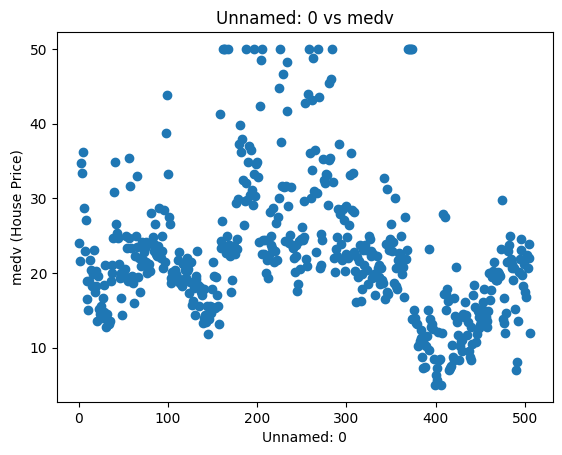

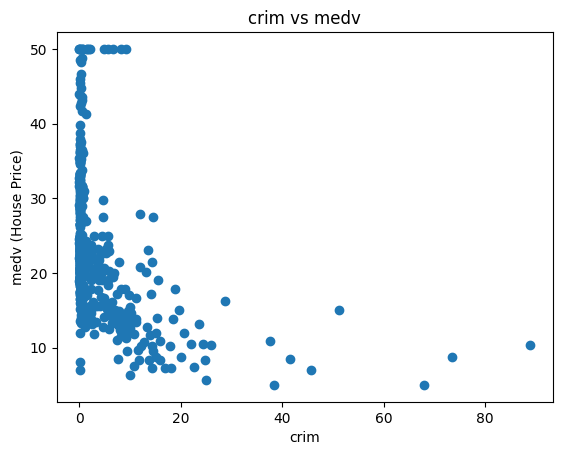

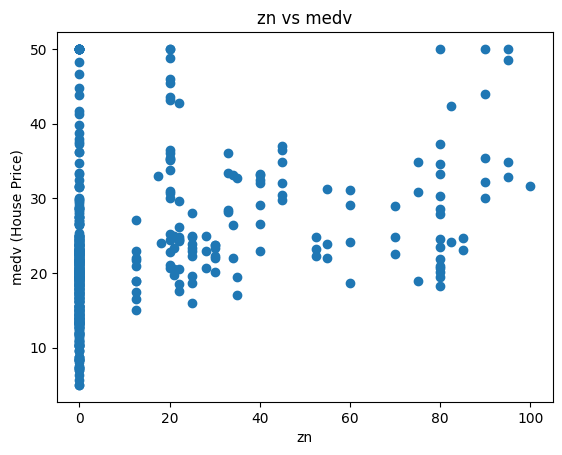

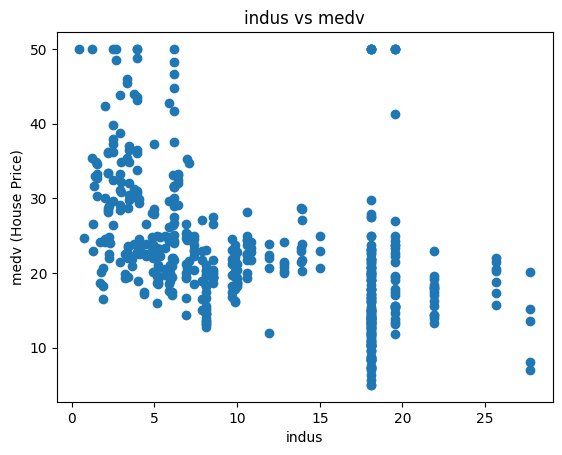

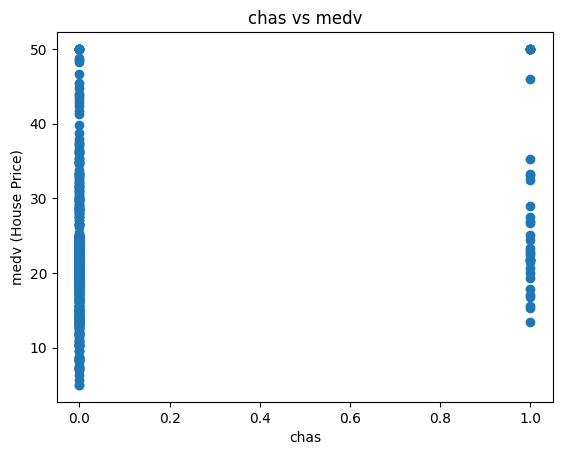

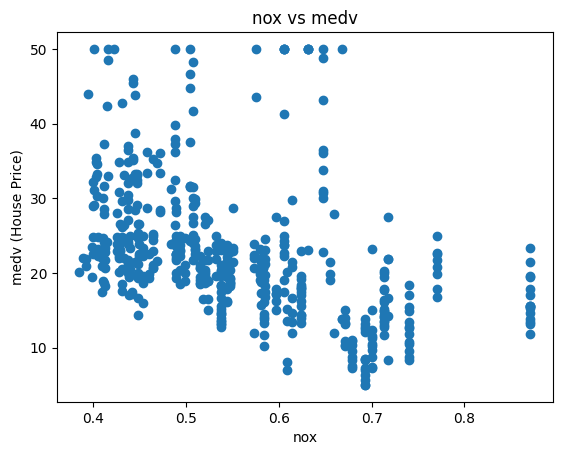

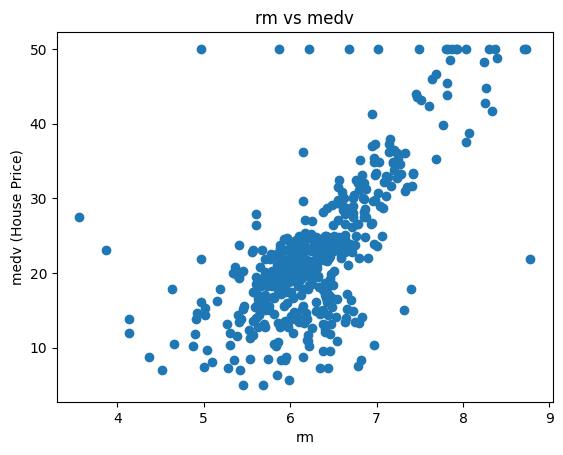

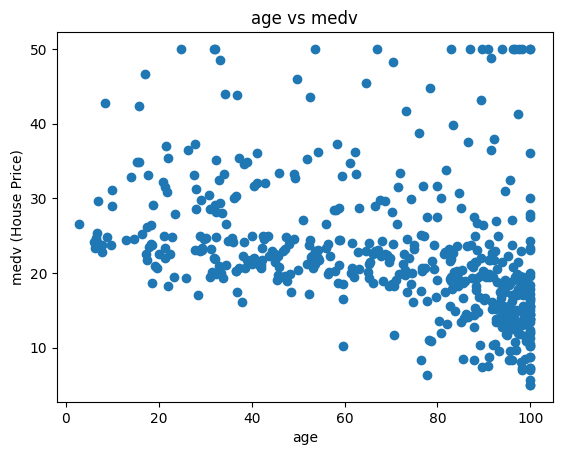

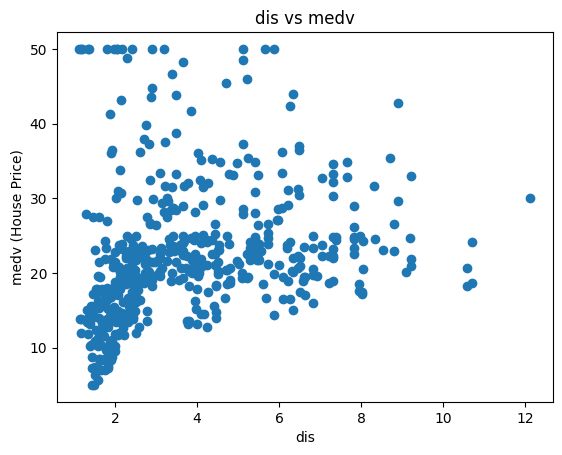

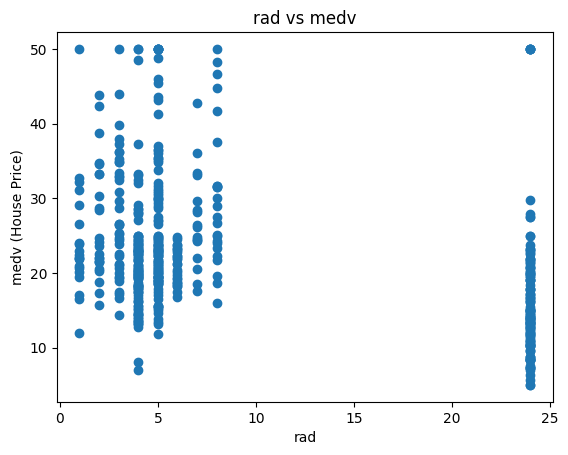

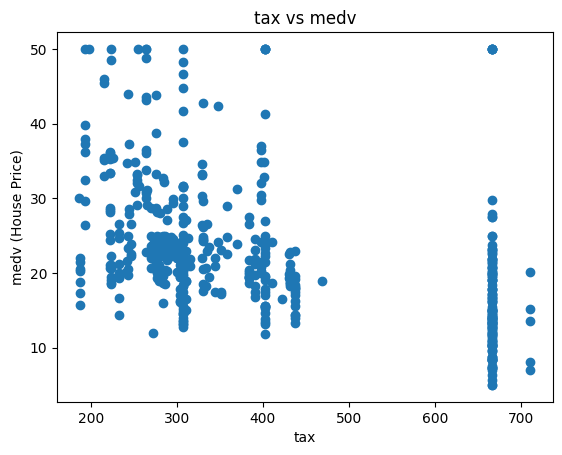

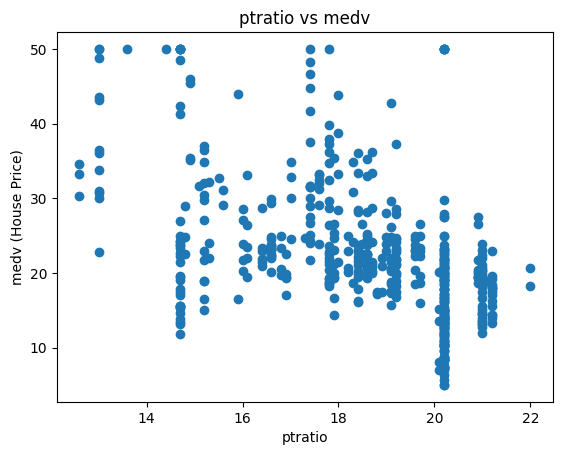

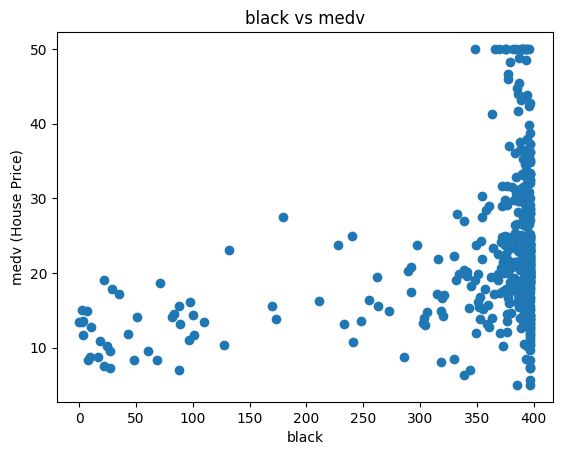

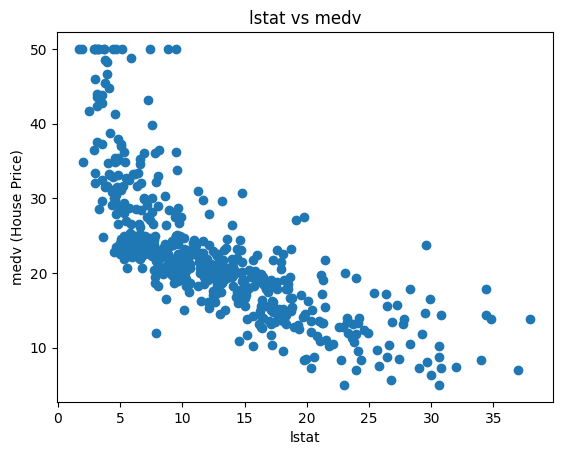

In [4]:
#Step 4: Plot the dataset
import matplotlib.pyplot as plt
for feature in X.columns:
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel("medv (House Price)")
    plt.title(f"{feature} vs medv")
    plt.show()

In [5]:
#Step 5: Split Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Step 6: Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
#Step 7: Predict House Prices
y_pred = model.predict(X_test)

In [8]:
#Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 24.497819777630266
R² Score: 0.6659408703343053


In [9]:
new_house = X_test.iloc[0].values.reshape(1, -1)
predicted_price = model.predict(new_house)

print("Predicted House Price:", predicted_price[0])


Predicted House Price: 28.97335363914236


C:\Users\ROG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


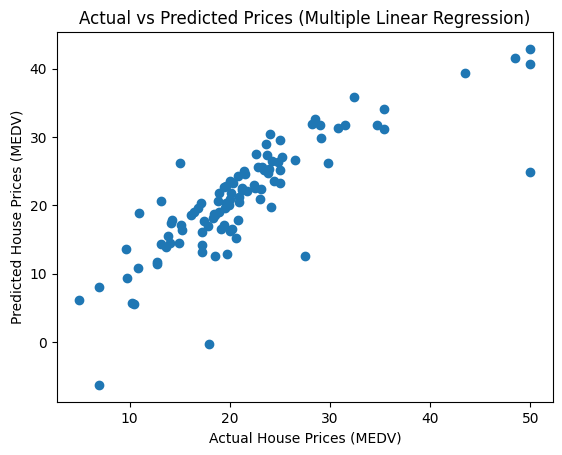

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices (MEDV)")
plt.ylabel("Predicted House Prices (MEDV)")
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)")
plt.show()


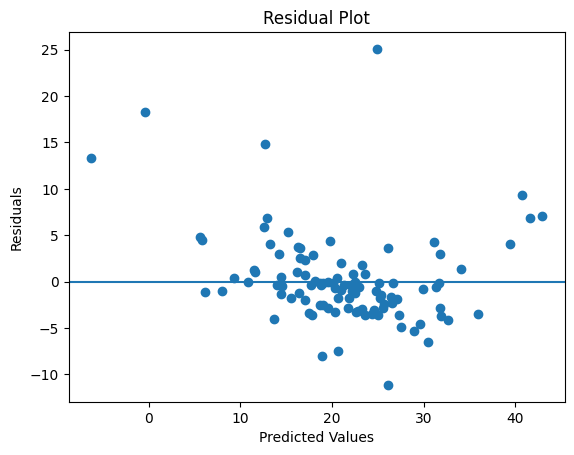

In [11]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0)
plt.show()


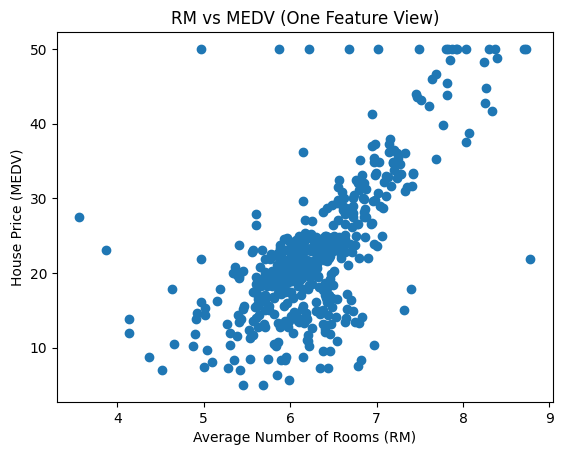

In [12]:
plt.scatter(df['rm'], df['medv'])
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("RM vs MEDV (One Feature View)")
plt.show()


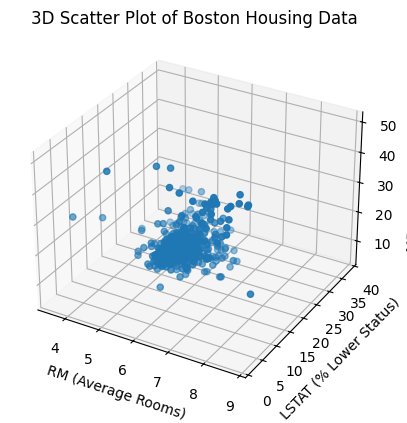

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['rm'], df['lstat'], df['medv'])

ax.set_xlabel("RM (Average Rooms)")
ax.set_ylabel("LSTAT (% Lower Status)")
ax.set_zlabel("MEDV (House Price)")

plt.title("3D Scatter Plot of Boston Housing Data")
plt.show()

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Select two features: RM and LSTAT
feature_cols = df.drop('medv', axis=1).columns
X_base = np.tile(df[feature_cols].mean().values, (rm_grid.size, 1))
X_base[:, df.columns.get_loc('rm')] = rm_grid.ravel()
X_base[:, df.columns.get_loc('lstat')] = lstat_grid.ravel()

# Convert to DataFrame with correct feature names
X_base_df = pd.DataFrame(X_base, columns=feature_cols)

# Predict
medv_pred = model.predict(X_base_df).reshape(rm_grid.shape)

import pandas as pd

# Suppose df is your original DataFrame
X_base_df = pd.DataFrame(X_base, columns=df.drop('medv', axis=1).columns)

# Predict
# Now predict
medv_pred = model.predict(X_base_df).reshape(rm_grid.shape)

# Plot 3D surface
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['rm'], df['lstat'], df['medv'], color='blue')  # data points
ax.plot_surface(rm_grid, lstat_grid, medv_pred, alpha=0.5, color='red')  # regression plane
ax.set_xlabel('rm')
ax.set_ylabel('lstat')
ax.set_zlabel('medv')
plt.show()

NameError: name 'rm_grid' is not defined